In [23]:
pip install scikit-XCS

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

data = pd.read_csv ('/content/winequality-red.csv')

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality num,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Bad


In [25]:
classLabel="quality num"
data2 = data.drop(classLabel, axis = 1)

In [26]:
ClassLabel="quality"
dataFeatures = data2.drop(ClassLabel,axis = 1).values

r=len(dataFeatures)
dataFeatures=dataFeatures[:r-1]

In [27]:
Features = data2.drop(ClassLabel,axis = 1).columns.values
#features=list(Features.columns.values)
print(Features)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']


In [28]:
dataActions = data[ClassLabel].values
dataActions= dataActions[:r-1]

In [29]:
dataActions

array(['Bad', 'Bad', 'Bad', ..., 'Bad', 'Bad', 'Bad'], dtype=object)

In [30]:
dataFeatures_train, dataFeatures_test, dataActions_train, dataActions_test = train_test_split(dataFeatures, dataActions, stratify=dataActions, random_state=1)

In [31]:
DataActions_train=LabelBinarizer().fit_transform(dataActions_train)
DataActions_test=LabelBinarizer().fit_transform(dataActions_test)  

In [32]:
l=len(DataActions_train)
Y=DataActions_train.reshape(l,)

In [33]:
from skXCS import XCS
model = XCS(N=10000, learning_iterations = 10000,nu = 10,alpha=0.9)
trainedModel = model.fit(dataFeatures_train,Y)

In [34]:
trainedModel.export_iteration_tracking_data("iterationData_white_wine_quality_XCS.csv")

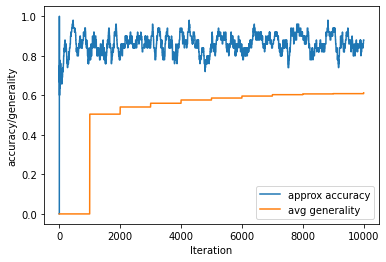

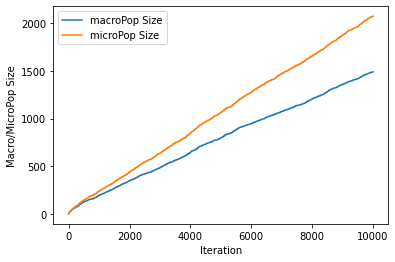

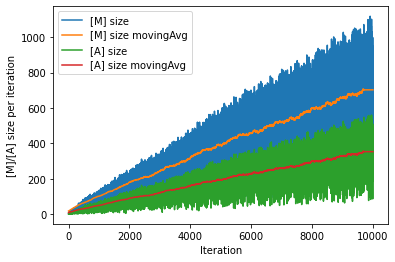

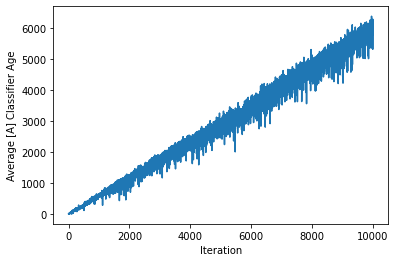

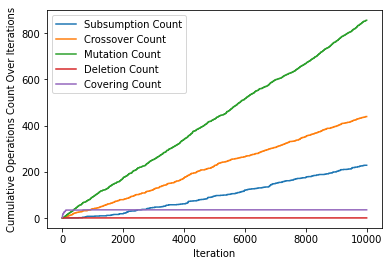

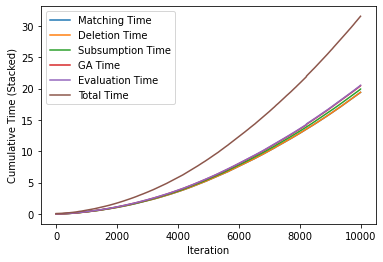

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("iterationData_white_wine_quality_XCS.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
aSize = dataTracking["Action Set Size"].values
experience = dataTracking["Average Iteration Age of Action Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total GA Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,aSize,label="[A] size")
plt.plot(iterations,movingAvg(aSize),label="[A] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[A] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [A] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="GA Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()

In [36]:
trainedModel.export_final_rule_population("RulePopulationWineQualiyRedXCS.csv",Features,ClassLabel)

populationData2 = pd.read_csv("RulePopulationWineQualiyRedXCS.csv")
display(populationData2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,#,#,#,"-1.2279999999999998,4.028",#,"-14.915,36.915","-50.44,96.44","0.9908011000000001,1.0001989","3.00075,3.6792499999999997","0.01550000000000007,1.1045",...,0.026753,1.000000e+00,40,690.291758,9992,0,0.636364,NaN,1232,4811
1,"2.1189999999999998,10.481",#,#,"-1.0820000000000003,3.882","-0.08772,0.24772","-6.039999999999999,28.04","-19.159999999999997,65.16","0.9909373,1.0000627","3.1904999999999997,3.4895","0.1392500000000001,0.98075",...,101.552517,7.714994e-11,2,434.748829,9945,0,0.727273,NaN,3044,4080
2,#,"-0.10749999999999998,0.9875",#,"-0.28000000000000025,8.48",#,"-8.880000000000003,30.880000000000003","-24.96,72.96000000000001","0.9924786999999999,1.0024213","2.8645,3.7155","0.4125,1.5675",...,60.849118,1.293301e-08,1,450.026732,9978,1,0.636364,NaN,5365,7216
3,#,"0.11880000000000002,0.7612",#,#,"-0.04277500000000001,0.226775","-0.7149999999999999,22.715","-75.28,123.28",#,#,"0.6765,1.3035",...,425.690431,4.605785e-17,1,344.472276,9960,1,0.454545,NaN,556,2266
4,#,"0.2537,0.7062999999999999","0.12955,0.69045","0.6720000000000002,5.927999999999999","0.008139999999999994,0.17586000000000002","12.51,39.49","-18.72,122.72","0.9958846,1.0005154",#,"0.03500000000000009,1.025",...,33.326737,5.324938e-06,5,642.569054,9861,2,0.818182,NaN,1317,1790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,#,"0.4138,1.0562",#,#,"-0.09965500000000001,0.14387",#,#,"0.9908011000000001,1.0028351",#,#,...,0.000000,1.000000e+00,1,718.000000,9992,9960,0.363636,NaN,2,12
1486,#,#,#,#,"-0.011869999999999992,0.278675","-37.03693712505634,36.915",#,#,"3.27875,4.14125","0.05025000000000002,1.08975",...,250.000000,9.437184e-15,1,468.000000,9960,9960,0.454545,NaN,2,12
1487,#,#,"-0.028349999999999986,0.69045","-1.2279999999999998,4.028",#,#,#,"0.9908011000000001,1.0001989","3.00075,3.6792499999999997",#,...,0.000000,1.000000e+00,1,545.515076,9987,9966,0.454545,NaN,15,17
1488,"8.5575,13.6425",#,#,#,#,"-14.915,36.915","-50.44,96.44",#,#,"0.01550000000000007,1.1045",...,0.000000,1.000000e+00,1,527.750000,9966,9966,0.454545,NaN,4,4


In [37]:
trainedModel.export_final_rule_population_DCAL("RulePopulationWineQualiyRedXCS2.csv",Features,ClassLabel)

populationData3 = pd.read_csv("RulePopulationWineQualiyRedXCS2.csv")
display(populationData3)

,Specified Values,Specified Attribute Names,quality,Fitness,Prediction,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,"[-1.2279999999999998,4.028], [-14.915,36.915],...","residual sugar, free sulfur dioxide, total sul...",1,0.133285,0.002308,0.026753,1.000000e+00,40,690.291758,9992,0,0.636364,NaN,1232,4811
1,"[2.1189999999999998,10.481], [-1.0820000000000...","fixed acidity, residual sugar, chlorides, free...",0,0.000246,956.305493,101.552517,7.714994e-11,2,434.748829,9945,0,0.727273,NaN,3044,4080
2,"[-0.10749999999999998,0.9875], [-0.28000000000...","volatile acidity, residual sugar, free sulfur ...",0,0.000239,978.436593,60.849118,1.293301e-08,1,450.026732,9978,1,0.636364,NaN,5365,7216
3,"[0.11880000000000002,0.7612], [-0.042775000000...","volatile acidity, chlorides, free sulfur dioxi...",1,0.000007,422.325574,425.690431,4.605785e-17,1,344.472276,9960,1,0.454545,NaN,556,2266
4,"[0.2537,0.7062999999999999], [0.12955,0.69045]...","volatile acidity, citric acid, residual sugar,...",0,0.002032,991.893514,33.326737,5.324938e-06,5,642.569054,9861,2,0.818182,NaN,1317,1790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,"[0.4138,1.0562], [-0.09965500000000001,0.14387...","volatile acidity, chlorides, density, alcohol",1,0.001426,0.000000,0.000000,1.000000e+00,1,718.000000,9992,9960,0.363636,NaN,2,12
1486,"[-0.011869999999999992,0.278675], [-37.0369371...","chlorides, free sulfur dioxide, pH, sulphates,...",1,0.001007,500.000000,250.000000,9.437184e-15,1,468.000000,9960,9960,0.454545,NaN,2,12
1487,"[-0.028349999999999986,0.69045], [-1.227999999...","citric acid, residual sugar, density, pH, alcohol",0,0.003810,1000.000000,0.000000,1.000000e+00,1,545.515076,9987,9966,0.454545,NaN,15,17
1488,"[8.5575,13.6425], [-14.915,36.915], [-50.44,96...","fixed acidity, free sulfur dioxide, total sulf...",0,0.002634,1000.000000,0.000000,1.000000e+00,1,527.750000,9966,9966,0.454545,NaN,4,4


In [38]:
l1=len(DataActions_test)
Y_test=DataActions_test.reshape(l1,)

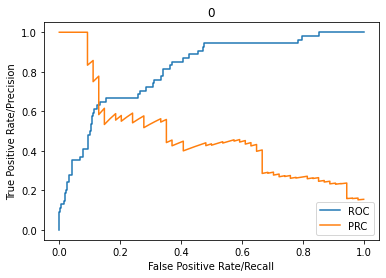

PRC AUC:0.46484090012935675
ROC AUC:0.8151359451937487


<Figure size 432x288 with 0 Axes>

In [39]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(dataFeatures_test)
fpr1, tpr1, thresholds1 = roc_curve(Y_test, probs[:,1])
prec1, recall1, thresholds1 = precision_recall_curve(Y_test, probs[:,1])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()
plt.savefig("Vgg19CNNClass0.png")

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

In [40]:
probs

array([[0.96232401, 0.03767599],
       [0.94832426, 0.05167574],
       [0.9659963 , 0.0340037 ],
       [0.96611979, 0.03388021],
       [0.9514929 , 0.0485071 ],
       [0.96623619, 0.03376381],
       [0.96875415, 0.03124585],
       [0.95240144, 0.04759856],
       [0.9651865 , 0.0348135 ],
       [0.96760221, 0.03239779],
       [0.97142957, 0.02857043],
       [0.9263131 , 0.0736869 ],
       [0.96221653, 0.03778347],
       [0.95962639, 0.04037361],
       [0.96706411, 0.03293589],
       [0.96655411, 0.03344589],
       [0.94937452, 0.05062548],
       [0.96499158, 0.03500842],
       [0.95243558, 0.04756442],
       [0.93215502, 0.06784498],
       [0.87014695, 0.12985305],
       [0.95468018, 0.04531982],
       [0.9646378 , 0.0353622 ],
       [0.97210053, 0.02789947],
       [0.96384509, 0.03615491],
       [0.91921071, 0.08078929],
       [0.87222629, 0.12777371],
       [0.96372165, 0.03627835],
       [0.8865556 , 0.1134444 ],
       [0.95937205, 0.04062795],
       [0.

In [41]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [42]:
fpr1

array([0.        , 0.        , 0.        , 0.00289017, 0.00289017,
       0.00578035, 0.00578035, 0.01445087, 0.01445087, 0.02023121,
       0.02023121, 0.02312139, 0.02312139, 0.02601156, 0.02601156,
       0.03179191, 0.03179191, 0.04046243, 0.04046243, 0.0433526 ,
       0.0433526 , 0.06936416, 0.06936416, 0.07803468, 0.07803468,
       0.09537572, 0.09537572, 0.09537572, 0.10115607, 0.10115607,
       0.10404624, 0.10404624, 0.10693642, 0.10693642, 0.10982659,
       0.10982659, 0.11560694, 0.11560694, 0.12427746, 0.12427746,
       0.13294798, 0.13294798, 0.15317919, 0.15317919, 0.26011561,
       0.26011561, 0.26589595, 0.26589595, 0.28612717, 0.28612717,
       0.30635838, 0.30635838, 0.31213873, 0.31213873, 0.33526012,
       0.33526012, 0.34104046, 0.34104046, 0.36416185, 0.36416185,
       0.3699422 , 0.3699422 , 0.38439306, 0.39017341, 0.40751445,
       0.40751445, 0.42485549, 0.42485549, 0.4566474 , 0.4566474 ,
       0.47109827, 0.47109827, 0.47398844, 0.47398844, 0.48554